In [1]:
import cv2
import math
import copy
import numpy as np
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import scipy.ndimage.filters as filters

In [49]:
# image parameters
top    = 1018
bottom = 0
left   = 203
right  = 1790
laser_line_num = 22
# start and end frame file last two digits
frame_i = 40
frame_f = 61

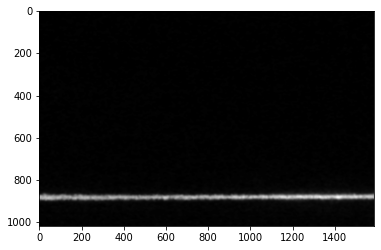

In [50]:
# import template frame
img_template = cv2.imread('DSC_9437.JPG',0)
# create list for storing frame information
img = np.linspace([],[],laser_line_num).tolist()
for i in range(frame_i,frame_f+1):
    img[i-frame_i] = cv2.subtract(cv2.imread('DSC_94'+str(i)+'.JPG',0), img_template) # subtrction reduce noise
    img[i-frame_i] = img[i-frame_i][bottom:top,left:right] # crop image
    img[i-frame_i] = cv2.blur(img[i-frame_i], [10,10])      # blur image
plt.imshow(img[0], cmap = 'gray') # image check

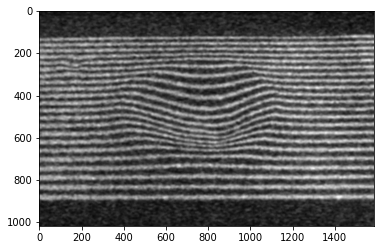

In [51]:
# ovrelay images
fullmap = img[0]
for i in range(len(img)-1):
    aggregate_img = fullmap
    next_img = img[i+1]
    fullmap = cv2.addWeighted(aggregate_img, 1, next_img, 1, 0)
plt.imshow(fullmap, cmap = 'gray')
plt.savefig('laser_crater', dpi=400, bbox_inches='tight')

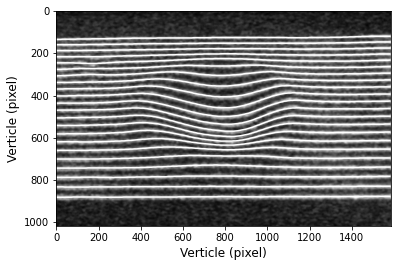

In [52]:
# storing all the fitting data 
# data structure [[],[],[],[],[],[]]
curves_fit = np.linspace([],[],len(img)).tolist() # create the structure 

# fit and store line information to structure 
step_size = 10 # this control how much point on a single fit 
for k in range(len(img)):
    for i in range(0,len(img[k][0]),step_size):
        y = img[k][:,i].tolist().index(max(img[k][:,i]))
        curves_fit[k].append(y) # append to list storing fits 
    curves_fit[k] = filters.gaussian_filter1d(curves_fit[k],sigma=5)
    print("frame "+str(k)+" completed", end='\r')
x = np.arange(0,len(img[k][0]),step_size) # create the horizontal points profile of image 

# check plot 
for i in range(len(img)):
    plt.plot(x, curves_fit[i][:], marker = 'o',markersize=0.01, color = 'white')
plt.xlabel('Verticle (pixel)', fontsize = 12)
plt.ylabel('Verticle (pixel)', fontsize = 12)
plt.imshow(fullmap, cmap = 'gray')
plt.savefig('laser_crater', dpi=1000, bbox_inches='tight')

Text(0, 0.5, 'Horizontal (cm)')

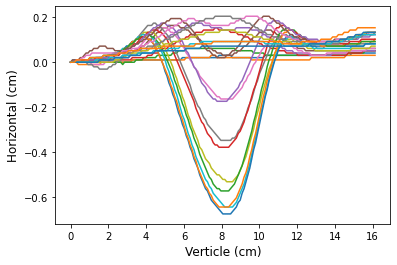

In [53]:
# make a replicate of curves_fit and x 
curves_fit_real = copy.deepcopy(curves_fit)
x_real = copy.deepcopy(x)

# converting curve fits to real value in cm
line_seperation = 0.5 # this is the seperation between each laser line in real unit
seperation_pixel = img[0][:,0].tolist().index(max(img[0][:,0])) - img[1][:,0].tolist().index(max(img[1][:,0]))
ratio = 0.5 / seperation_pixel
for k in range(len(img)):
    zero = ratio * curves_fit_real[k][0]
    curves_fit_real[k] = [-(i * ratio  - zero) for i in curves_fit_real[k]]
    print("frame "+str(k)+" completes", end='\r')
    
# converting x to real value in cm
x_real = [i * ratio for i in x_real]

for i in range(len(img)):
    plt.plot(x_real, curves_fit_real[i][:], marker = 'o',markersize=0.01)
plt.xlabel('Verticle (cm)', fontsize = 12)
plt.ylabel('Horizontal (cm)', fontsize =12)

/var/folders/hv/gy77k6wd7xj8h6rn0b0xrn5c0000gn/T/ipykernel_9551/3146934350.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


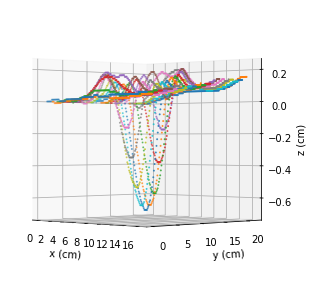

In [54]:
# Plot non-smoothed and smoothed contous
# generate y 
yy_real = np.linspace([],[],len(img)).tolist()
for k in range(len(img)):
    for i in range(len(x_real)):
        yy_real[k].append(0.5+k)

fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
for i in range(len(img)):
    ax.scatter(x_real, yy_real[i][:], curves_fit_real[i][:], s=1)
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)') 
ax.set_zlabel('z (cm)') 
ax.set_aspect('auto')
ax.set_box_aspect([1,1,1])
ax.view_init(0, -45)
plt.savefig('laser_crater_3d', dpi=400, bbox_inches='tight')

/var/folders/hv/gy77k6wd7xj8h6rn0b0xrn5c0000gn/T/ipykernel_9551/2707519546.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


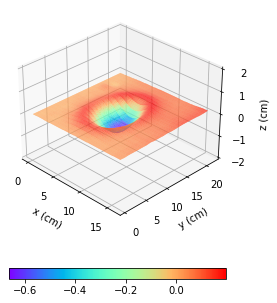

In [55]:
xx = x_real*laser_line_num
yy = []
zz = []
# convert three axis to 1d array / list 
for i in range(laser_line_num):
    temp = np.linspace(0.5+i,0.5+i,len(x_real)).tolist()
    yy = yy + temp
    zz = zz + curves_fit_real[i]

# plot 3d surface 
k = 30
j = -45
## Plot non-smooth contours surface with triangles
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
surface = ax.plot_trisurf(xx, yy, zz, linewidth=1.2, antialiased=True, cmap=cm.rainbow)
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_zlabel('z (cm)')
ax.set_zlim3d(-2, 2)
ax.view_init(k, j)
fig.colorbar(surface, fraction=0.04, orientation = 'horizontal')
plt.savefig('laser_'+str(k)+'.png', dpi=200, bbox_inches='tight')
print('frame '+str(k)+' completes', end='\r')

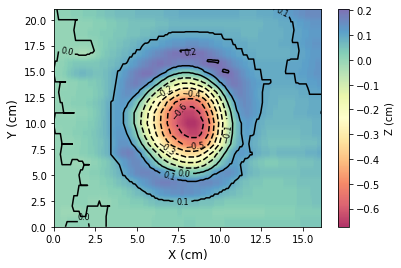

In [80]:
y = np.arange(0.0,laser_line_num,1)
X, Y = np.meshgrid(x_real, y)
z = np.array(zz)
f = plt.figure()
z = z.reshape(len(y), len(x_real))
contours = plt.contour(X, Y, z, 8, colors='black')
plt.clabel(contours, inline=True, fontsize=8, colors='black')
plt.imshow(z, extent=[0, max(x_real), 0, max(y)], origin='lower',cmap='Spectral', alpha=0.8,\
          aspect='auto')
plt.xlabel('X (cm)', fontsize = 12)
plt.ylabel('Y (cm)', fontsize = 12)
plt.colorbar(label=r'Z (cm)')
plt.savefig('contour', dpi=500, bbox_inches='tight')